In [1]:
import pandas as pd
import numpy as np

## Datos

In [2]:
estaciones_info = pd.read_excel('data/Estaciones.xlsx', sheet_name='INFO')
estaciones_maximos = pd.read_excel('data/Estaciones.xlsx', sheet_name='Maximos', header=1, parse_dates=['Año hid'])
estaciones_anuales = pd.read_excel('data/Estaciones.xlsx', sheet_name='Anuales', header=1, parse_dates=['Año hid'])
estaciones_np95 = pd.read_excel('data/Estaciones.xlsx', sheet_name='Np95', header=1, parse_dates=['Año hid'])

In [3]:
estaciones_info

,Estacion,Provincia,Organismo,"LAT (S), LONG (W)(º)",inicio,fin
0,San Luis,Salta,SRHN,"26.06, 66.00",1953,1999
1,Miraflores,Salta,SRHN,"25.36, 64.82",1952,1986
2,Pozo Sarmiento,Salta,SRHN,"23.21, 64.20",1946,2019
3,Pie de Medano,Catamarca,SRHN,"26.98, 66.22",1971,2019
4,Valle Viejo,Catamarca,INTA,"28.48, 65.73",1959,2007
5,Caimancito,Jujuy,SRHN,"23.70, 64.53",1948,2019
6,Casa de Piedra,Tucuman,SRHN,"27.27, 65.90",1989,2019
7,Potrero del Clavillo,Tucuman,SRHN,"27.40, 65.97",1954,2019
8,Piedra Grande,Tucuman,SRHN,"27.30, 65.90",1989,2019
9,Los Sosa,Tucuman,SRHN,"27.10, 65.63",1954,2019


In [4]:
estaciones_maximos.head()

,Año hid,San Luis,Miraflores,Pozo Sarmiento,Pie de Medano,Valle Viejo,Caimancito,Casa de Piedra,Potrero del Clavillo,Piedra Grande,Los Sosa,Padilla,La Maria,San Luis Tucuman
0,1946-01-01,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-01-01,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-01-01,NaN,NaN,76.3,NaN,NaN,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1949-01-01,NaN,NaN,64.4,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-01,NaN,NaN,60.0,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
predictores = pd.read_excel('data/variables e indices NDEFM.xlsx', parse_dates=['año'])

In [6]:
predictores.head()

,año,humedad esp (g/kg),omega (Pa/s),SLP PACIFICO,P ATL,indice SOI,indice SAM,
0,1949-01-01,8.7958,0.002598,1018.8150,1017.2874,NaN,NaN,NaN
1,1950-01-01,10.6268,-0.022770,1019.0520,1015.9596,NaN,NaN,NaN
2,1951-01-01,10.2252,-0.020314,1018.1772,1016.6636,NaN,NaN,NaN
3,1952-01-01,11.3264,-0.026402,1019.0196,1016.5650,-0.50,NaN,NaN
4,1953-01-01,11.2208,-0.024602,1020.5140,1016.7198,-0.32,NaN,NaN


In [7]:
reanalisis_info = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='INFO')
reanalisis_total = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Total', parse_dates=['año'])
reanalisis_maximos = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Maximo', parse_dates=['año'])
reanalisis_np95 = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Np95', parse_dates=['año'])

In [8]:
reanalisis_maximos

,año,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1949-01-01,20.287294,38.720537,37.386548,32.385281,43.929565,11.971085,12.374612,34.148101,35.017024,...,7.356312,11.720944,63.555231,22.137139,22.831314,10.300575,22.373767,69.669736,34.048654,22.003633
1,1950-01-01,27.242772,19.474208,29.239211,43.476413,52.598838,31.269913,49.861191,44.131138,46.194214,...,13.513379,37.182600,59.925671,32.968821,26.752663,30.549258,63.598919,105.787798,72.557917,24.010511
2,1951-01-01,16.470295,21.656695,26.337813,36.614660,50.361037,5.525880,18.176521,59.258914,28.483253,...,13.639656,39.508216,57.073305,44.255624,32.021010,23.134297,50.460988,86.030611,46.753835,42.416010
3,1952-01-01,13.476709,28.048341,25.628226,23.339894,37.725264,14.172122,16.297007,48.382309,23.585610,...,18.348867,55.425040,74.067889,35.083837,33.594158,33.687994,72.280340,83.571293,59.194023,28.732013
4,1953-01-01,8.263137,25.103738,32.833789,29.467319,44.328824,9.624769,28.969231,30.059638,23.328737,...,14.325394,43.211232,87.727837,36.456771,26.949269,21.506477,49.043151,67.695417,41.820643,18.530628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2005-01-01,8.850662,8.529577,33.174725,41.421889,51.076867,13.320961,5.676065,26.688955,21.066733,...,8.857290,14.422395,73.932284,37.001985,27.042198,13.208518,31.395327,99.874628,38.939290,35.326178
57,2006-01-01,13.589807,18.780527,23.778998,18.422525,55.607632,6.002174,8.850021,25.239077,22.737927,...,10.790387,22.986769,42.150372,46.364815,19.053944,12.260273,40.761147,53.101102,39.520382,20.413209
58,2007-01-01,9.408822,13.072707,35.640106,21.297657,55.474096,8.704013,4.717350,32.746043,33.051778,...,7.357363,14.800405,48.969825,29.489626,23.115128,4.057207,65.466105,63.148283,53.368797,16.198640
59,2008-01-01,8.508487,28.527486,24.520116,22.910625,37.398577,9.371623,9.930126,25.416477,20.986691,...,14.191050,18.295916,37.007765,31.224162,25.089202,6.101720,43.179071,70.221434,34.712896,30.740513


In [9]:
reanalisis_np95

,año,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1949-01-01,4,2,2,3,5,5,1,8,3,...,0,0,4,3,1,1,0,5,3,4
1,1950-01-01,7,3,8,6,5,4,10,5,9,...,5,35,31,13,11,22,43,36,19,9
2,1951-01-01,3,4,1,4,1,0,8,3,5,...,5,17,17,12,9,18,14,32,21,17
3,1952-01-01,1,5,6,1,1,1,3,6,1,...,6,28,31,9,12,16,30,44,14,15
4,1953-01-01,2,5,3,5,4,5,10,4,3,...,10,31,28,9,5,21,21,22,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2005-01-01,2,0,2,5,4,4,0,1,1,...,2,0,12,14,6,1,3,18,14,5
57,2006-01-01,2,1,1,1,2,1,0,1,1,...,0,2,10,9,5,3,6,11,7,2
58,2007-01-01,4,0,3,1,8,2,0,3,3,...,0,1,19,14,2,0,1,12,12,1
59,2008-01-01,2,1,2,2,2,2,0,1,1,...,1,1,8,7,7,0,6,16,12,5


## Análisis exploratorio

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

In [11]:
register_matplotlib_converters()
sns.set(rc={'figure.figsize': (12,8)})

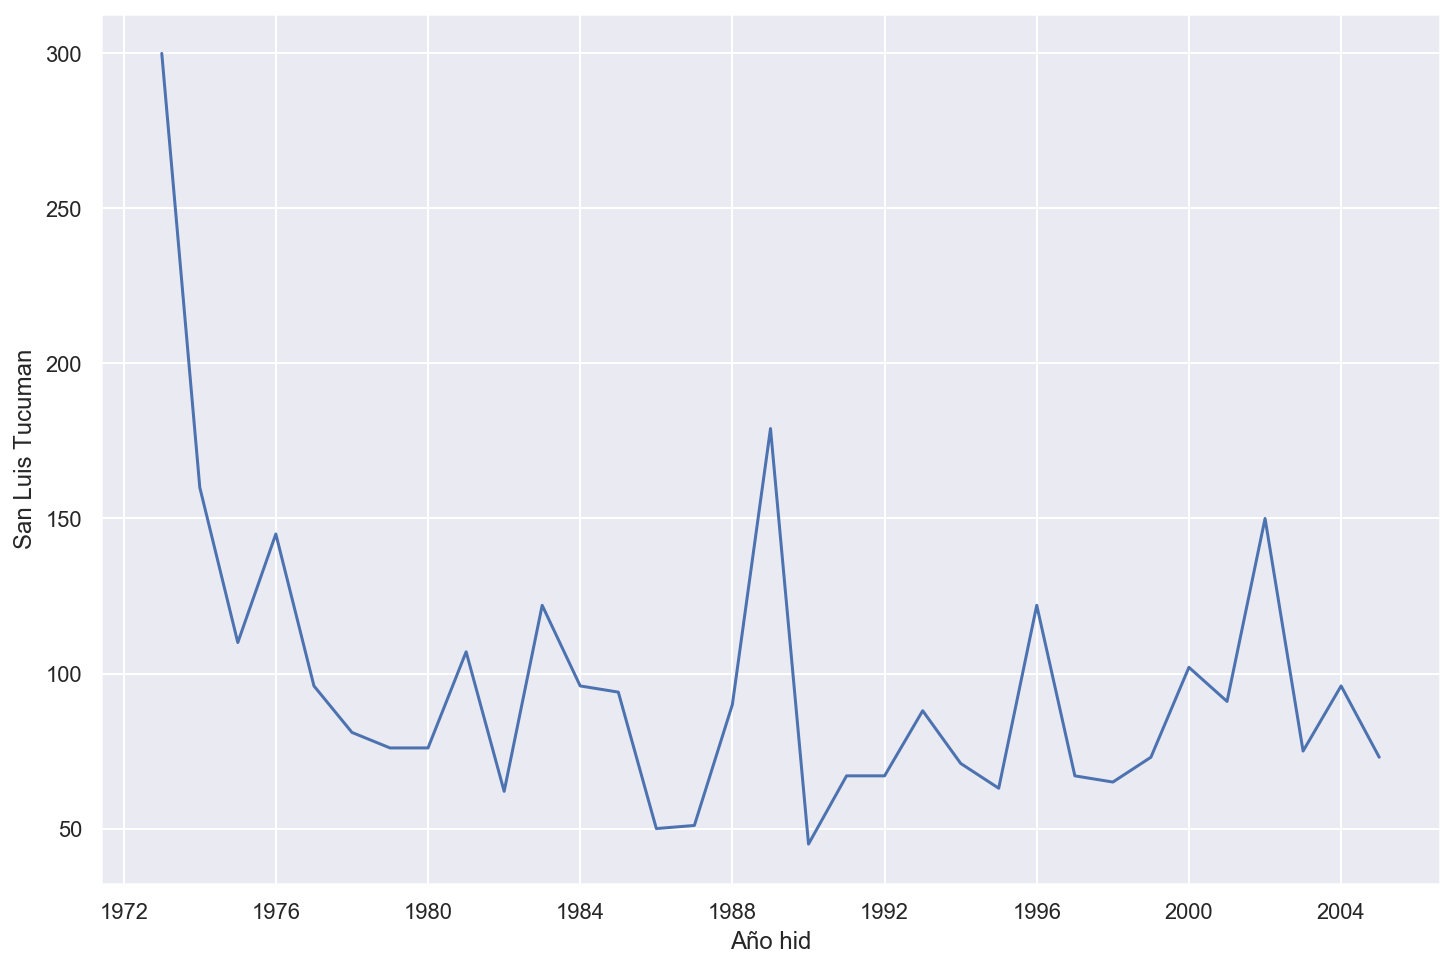

In [12]:
sns.lineplot(x='Año hid', y='San Luis Tucuman', data=estaciones_maximos);

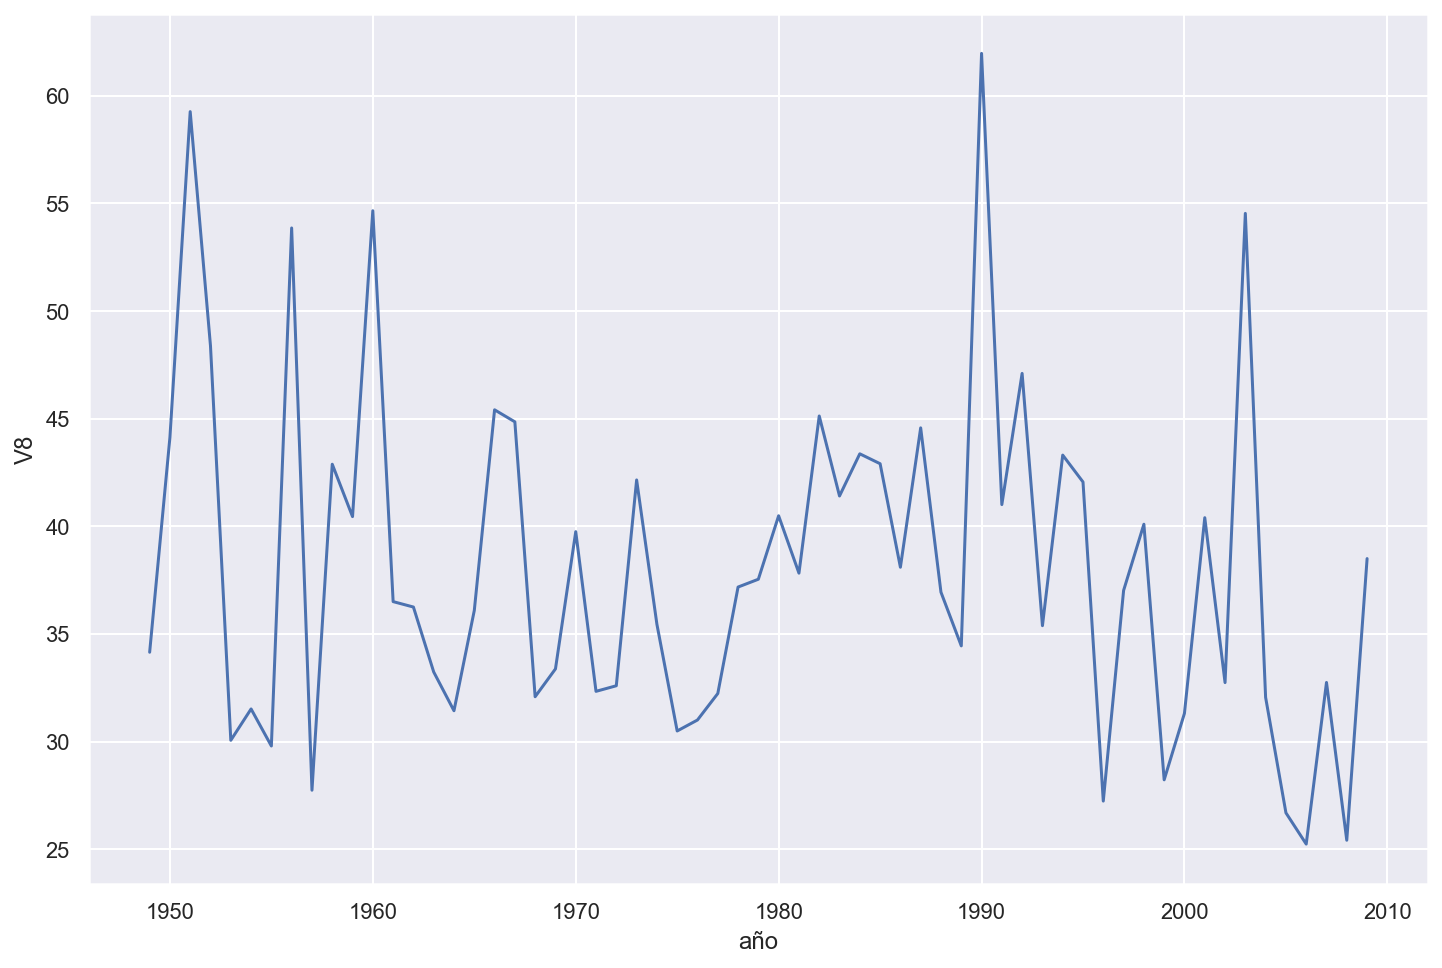

In [13]:
sns.lineplot(x='año', y='V8', data=reanalisis_maximos);

In [14]:
reanalisis_maximos['V8'].describe()

count    61.000000
mean     38.114413
std       8.046756
min      25.239077
25%      32.232370
50%      37.019585
75%      42.881099
max      61.964506
Name: V8, dtype: float64

In [15]:
estaciones_maximos['San Luis Tucuman'].describe()

count     33.000000
mean      97.272727
std       48.514993
min       45.000000
25%       67.000000
50%       88.000000
75%      107.000000
max      300.000000
Name: San Luis Tucuman, dtype: float64

In [16]:
slt_maximos = estaciones_maximos.loc[:, ['Año hid', 'San Luis Tucuman']].dropna().reset_index(drop=True)
inicio, fin = slt_maximos['Año hid'].min(), slt_maximos['Año hid'].max()

In [17]:
maximos_v8 = reanalisis_maximos.loc[:, ['año', 'V8']]
maximos_v8 = maximos_v8.query('año >= @inicio & año <= @fin').reset_index(drop=True)

In [18]:
df_maximos = maximos_v8
df_maximos.columns = ['año', 'modelo']
df_maximos['valor'] = slt_maximos['San Luis Tucuman']

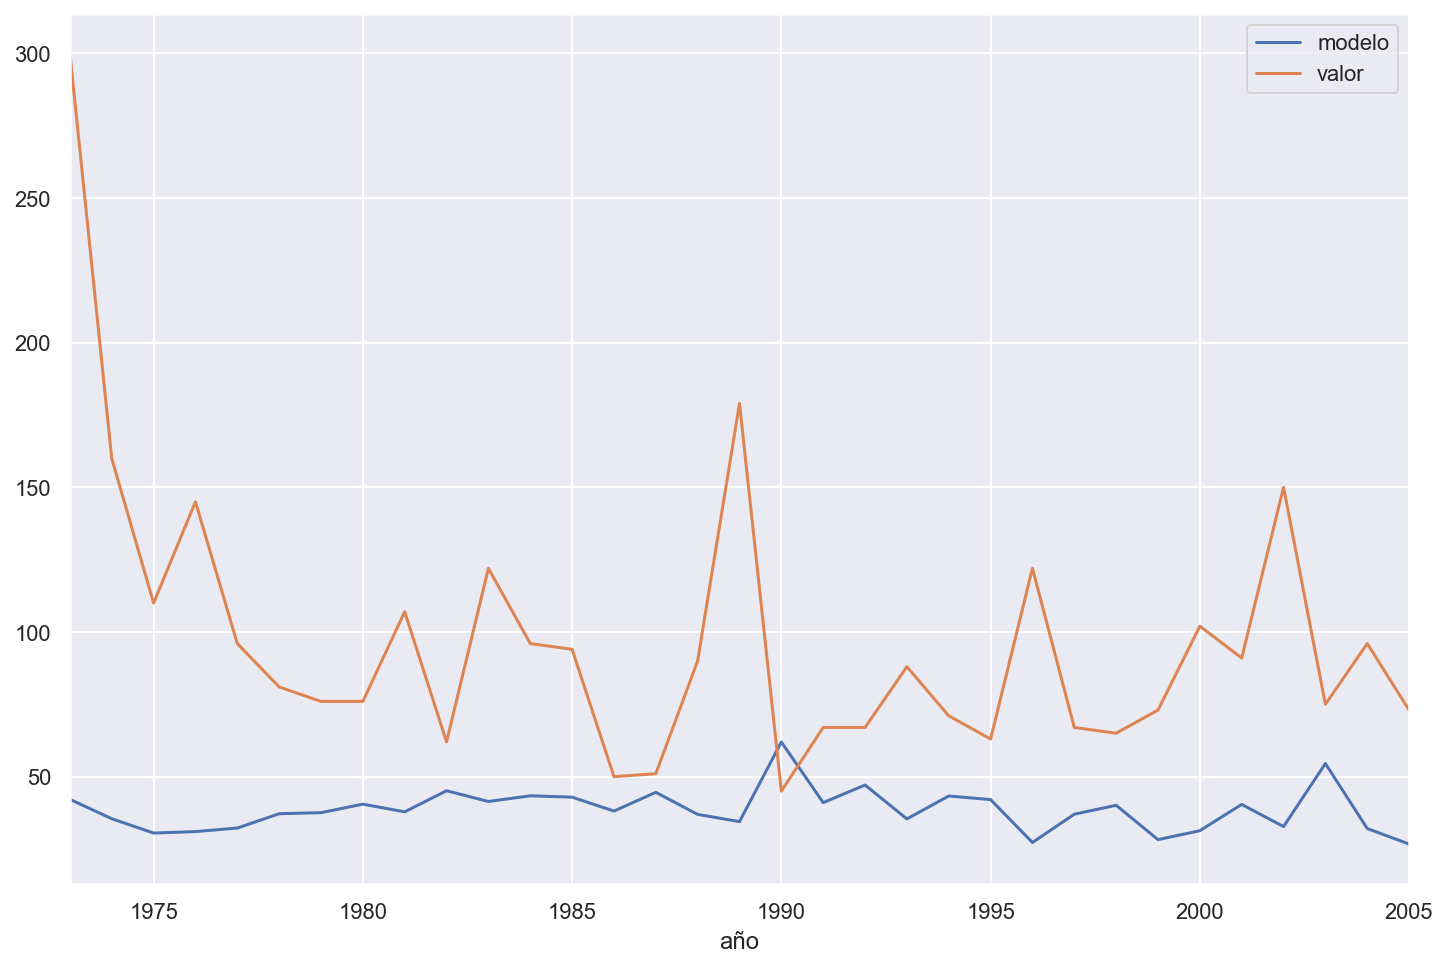

In [19]:
df_maximos.set_index('año').plot();

In [20]:
slt_anuales = estaciones_anuales.loc[:, ['Año hid', 'San Luis Tucuman']].dropna().reset_index(drop=True)
inicio, fin = slt_anuales['Año hid'].min(), slt_anuales['Año hid'].max()

In [21]:
anuales_v8 = reanalisis_total.loc[:, ['año', 'V8']]
anuales_v8 = anuales_v8.query('año >= @inicio & año <= @fin').reset_index(drop=True)

In [22]:
df_anuales = anuales_v8
df_anuales.columns = ['año', 'modelo']
df_anuales['valor'] = slt_anuales['San Luis Tucuman']

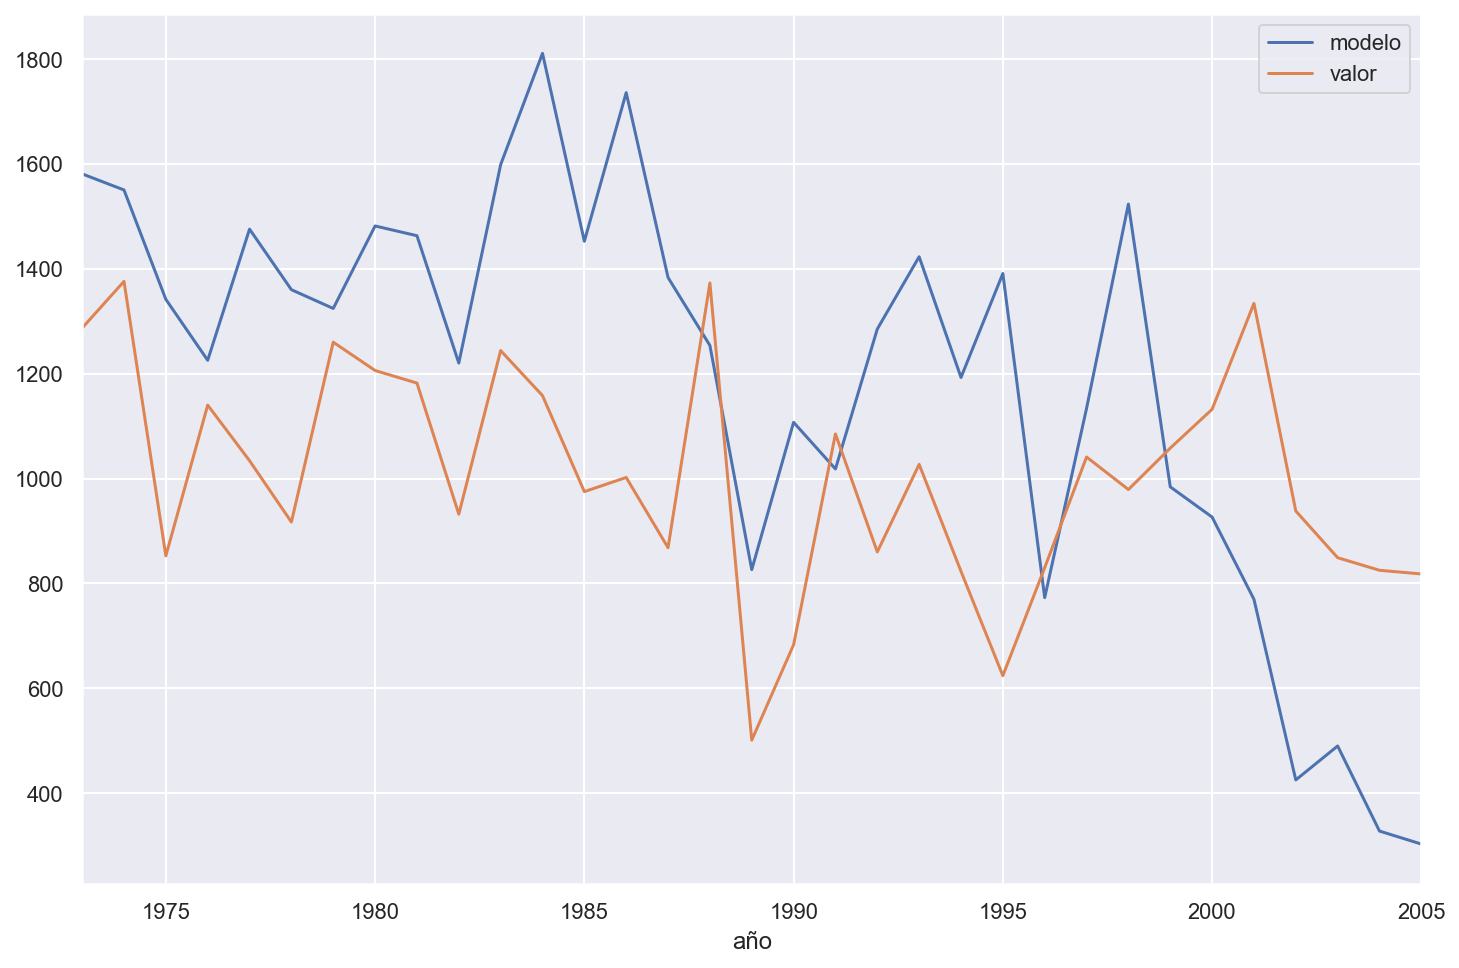

In [23]:
df_anuales.set_index('año').plot();

In [24]:
import statsmodels.api as sm

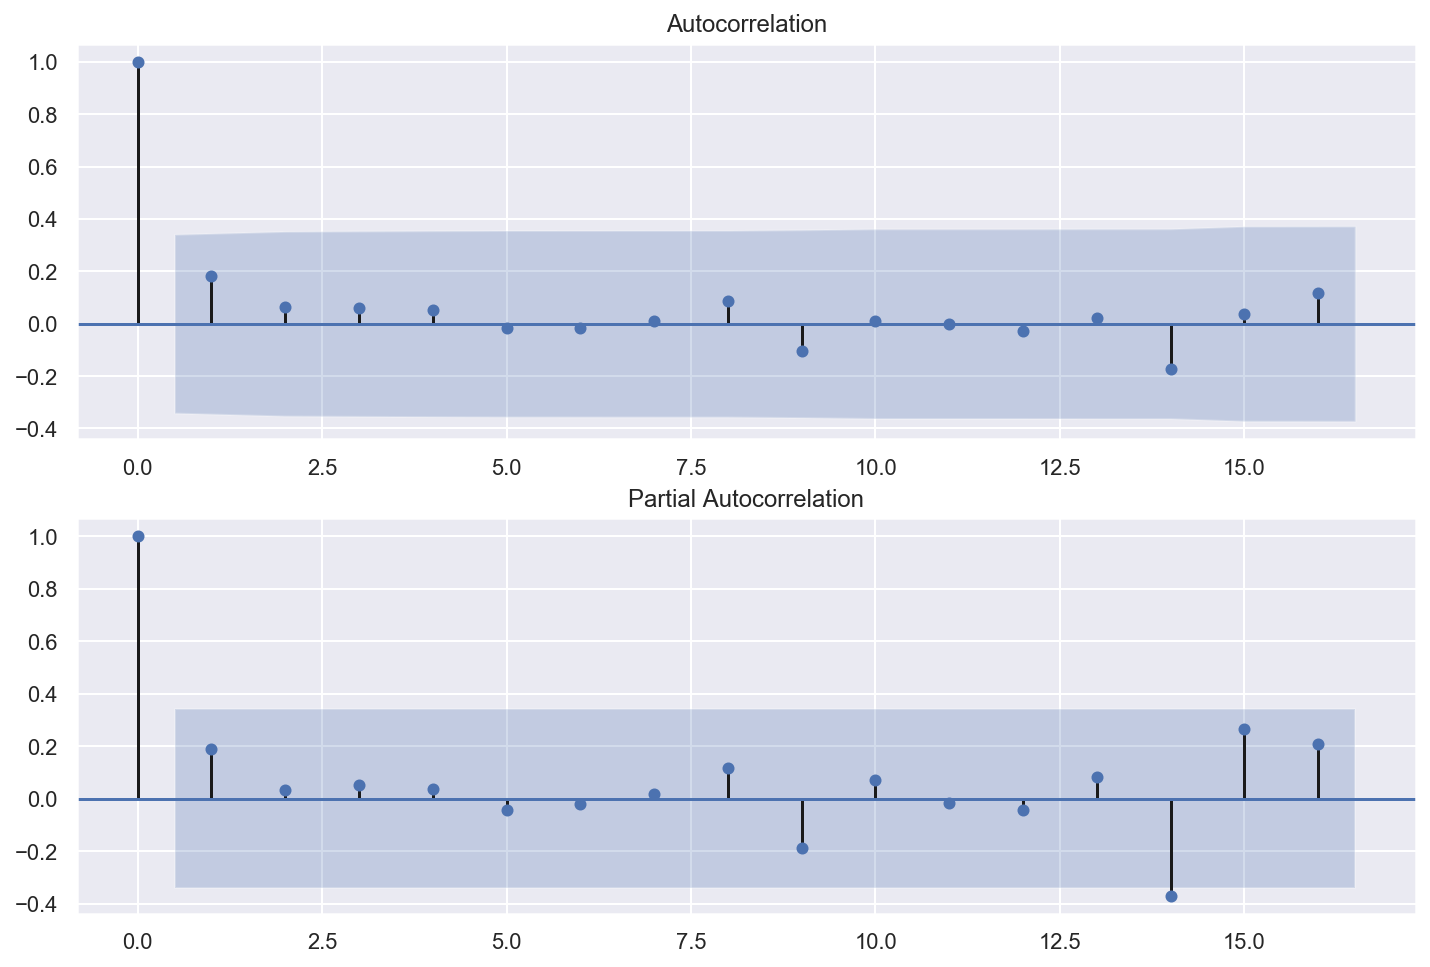

In [25]:
fig, (ax1, ax2) = plt.subplots(2)
sm.graphics.tsa.plot_acf(df_maximos['valor'], ax=ax1)
sm.graphics.tsa.plot_pacf(df_maximos['valor'], ax=ax2);

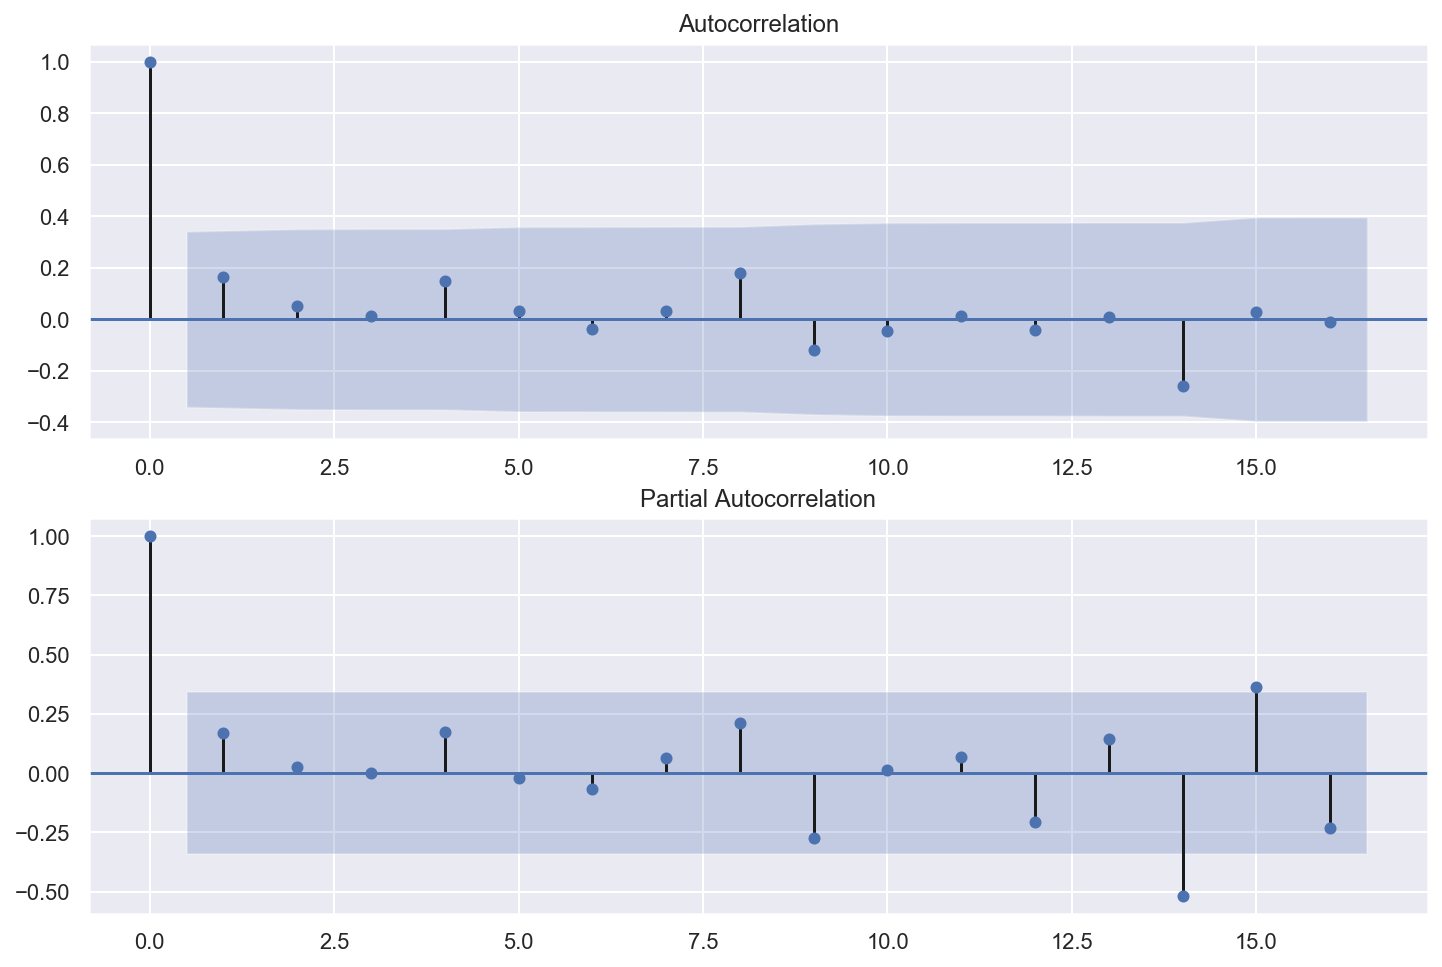

In [26]:
fig, (ax1, ax2) = plt.subplots(2)
sm.graphics.tsa.plot_acf(np.log(df_maximos['valor']), ax=ax1)
sm.graphics.tsa.plot_pacf(np.log(df_maximos['valor']), ax=ax2);

## Metodos de Time Series (AR/ARIMA)

In [27]:
estaciones_maximos_ = estaciones_maximos.set_index('Año hid')

In [28]:
maximos_sl_tucuman = estaciones_maximos_.truncate(before=pd.Timestamp('1973-01-01'))[['San Luis Tucuman']]

In [29]:
import pmdarima as pm

stepwise_fit = pm.auto_arima(maximos_sl_tucuman, start_p=1, start_q=1,
                             max_p=3, max_q=3,
                             start_P=0, seasonal=False,
                             d=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

Fit ARIMA: order=(1, 1, 1); AIC=344.069, BIC=349.932, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 0); AIC=345.124, BIC=348.056, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=343.223, BIC=347.621, Fit time=0.020 seconds
Fit ARIMA: order=(0, 1, 1); AIC=341.460, BIC=345.857, Fit time=0.020 seconds
Fit ARIMA: order=(0, 1, 2); AIC=343.451, BIC=349.314, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.150 seconds


In [30]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -167.730
Method:                       css-mle   S.D. of innovations             45.443
Date:                Thu, 20 Feb 2020   AIC                            341.460
Time:                        11:30:03   BIC                            345.857
Sample:                             1   HQIC                           342.918
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0059      3.852     -1.040      0.298     -11.556       3.544
ma.L1.D.y     -0.5710      0.215     -2.658      0.008      -0.992      -0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.7514           +0.0000j            1.7514            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
# Parametros ARIMA
p = 0
d = 1
q = 1
# Número de predicciones a futuro
n = 10

In [32]:
model_arima = sm.tsa.statespace.SARIMAX(maximos_sl_tucuman.values,order=(p,d,q), seasonal=False)

In [33]:
fit = model_arima.fit()

In [34]:
prediction = fit.forecast(n)

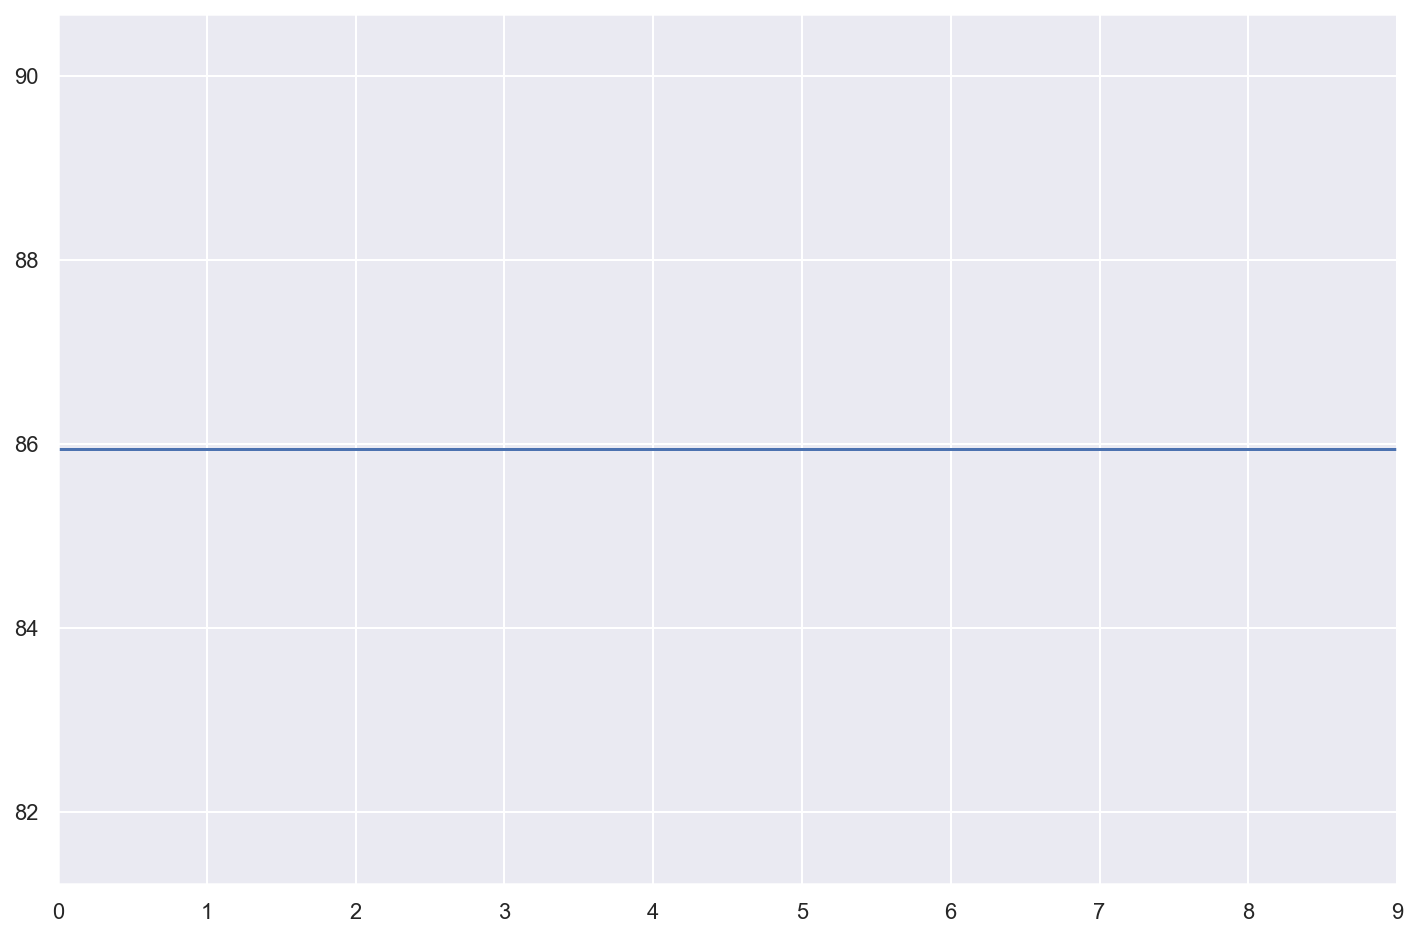

In [35]:
pd.Series(prediction).plot();

In [36]:
import pymc3 as pm

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [phi_1]
Sampling 2 chains: 100%|██████████| 28000/28000 [00:08<00:00, 3125.57draws/s]
/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.4881e+05, ||grad|| = 2.9917e+05: 100%|██████████| 4/4 [00:00<00:00, 512.77it/s]


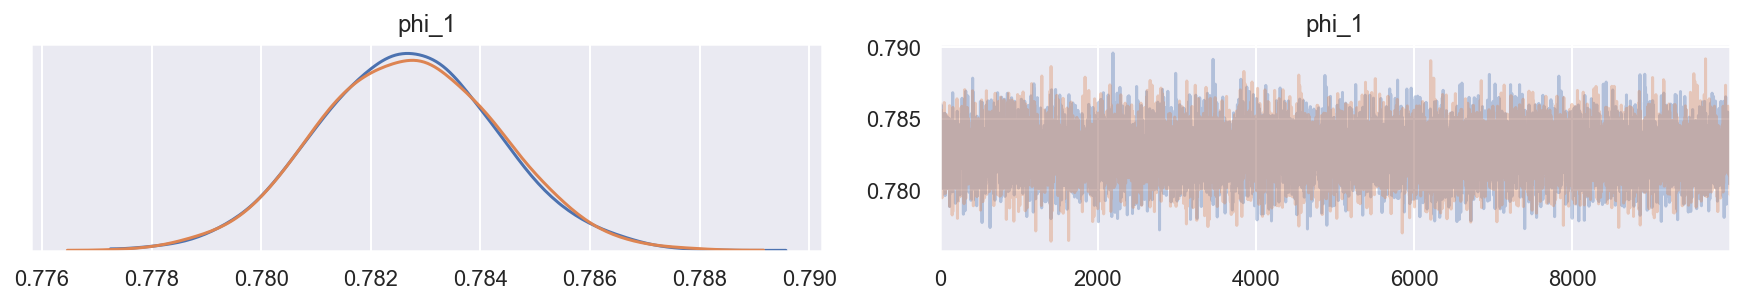

In [37]:
sigma = 1.0

with pm.Model() as ar1:
    phi1 = pm.Normal('phi_1', mu=0, sigma=sigma)
    data = pm.AR('p', phi1, observed=maximos_sl_tucuman)
    trace = pm.sample(10000, tune=4000)
    map_ar1 = pm.find_MAP()

pm.traceplot(trace);

In [38]:
phi1_hat = map_ar1['phi_1']

In [39]:
steps = 10

last_day = maximos_sl_tucuman.index[-1]
last_value = maximos_sl_tucuman.loc[last_day, 'San Luis Tucuman']
forecast_period = pd.date_range(start=last_day + pd.DateOffset(years=1), periods=steps, freq='AS')

forecast = np.repeat(phi1_hat, steps).cumprod()
forecasts = pd.DataFrame({'forecast': last_value * forecast}, index=forecast_period)
forecast_df = maximos_sl_tucuman.append(forecasts, sort=True)

In [40]:
def plot_forecast(forecast_df, steps=10):
    ax = sns.lineplot(x=forecast_df.index[-2*steps:-steps], y=forecast_df['San Luis Tucuman'][-2*steps:-steps], label='Precipitacion maxima')
    sns.lineplot(x=forecast_df.index[-steps:], y=forecast_df['forecast'][-steps:], label='Predicción', ax=ax)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precipitacion')
    ax.figure.autofmt_xdate()
    ax.set_title('Precipitacion maxima San Luis-Tucuman');

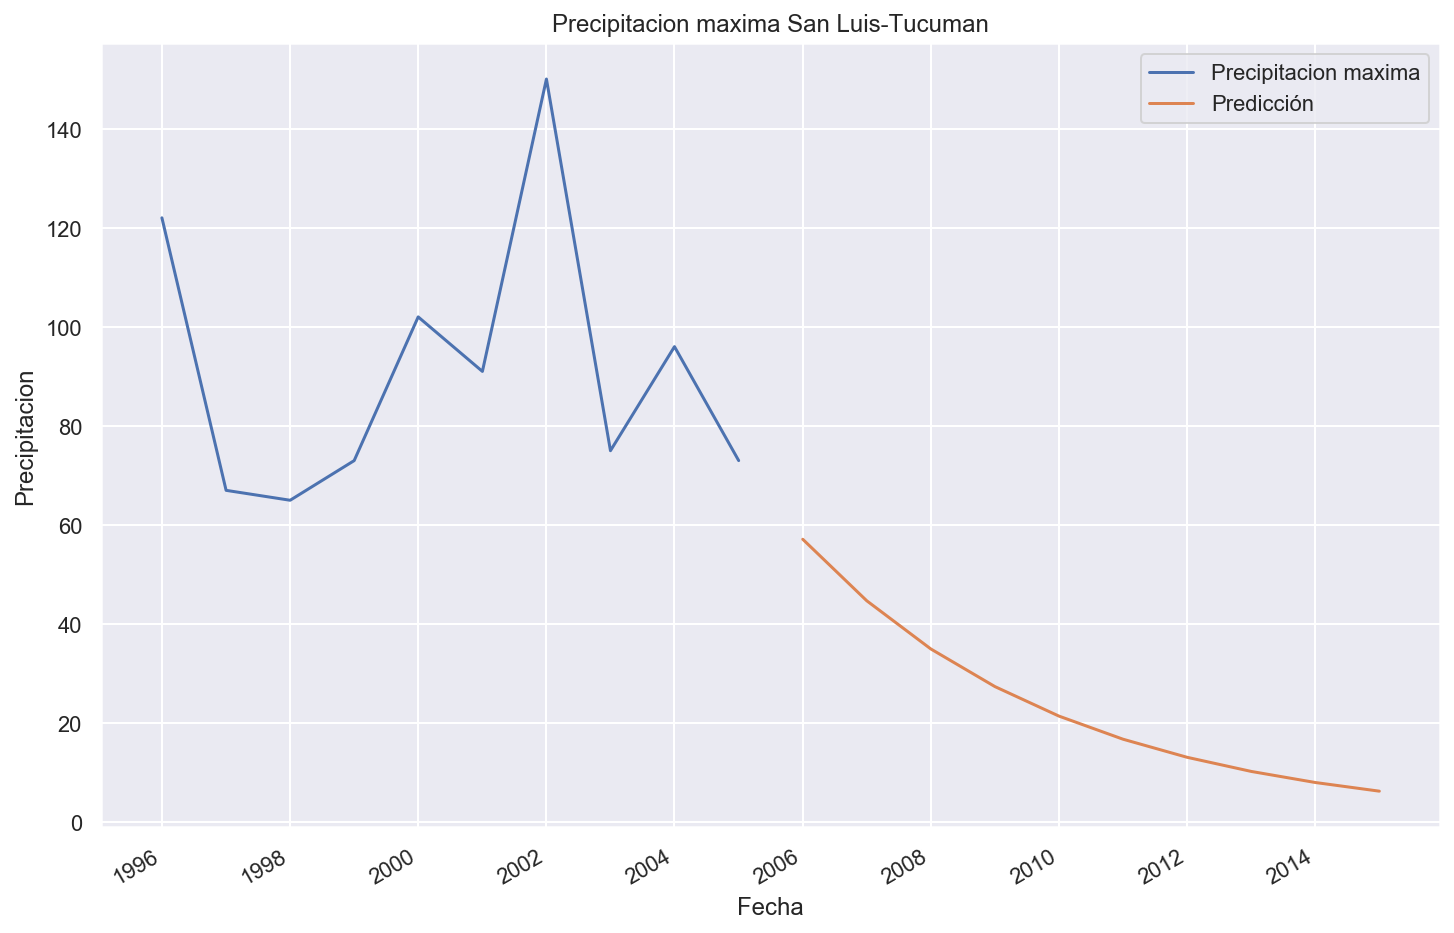

In [41]:
plot_forecast(forecast_df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [phi_2, phi_1]
Sampling 2 chains: 100%|██████████| 28000/28000 [00:18<00:00, 1504.10draws/s]
/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.3601e+05, ||grad|| = 3.7224e+05: 100%|██████████| 9/9 [00:00<00:00, 2290.02it/s]


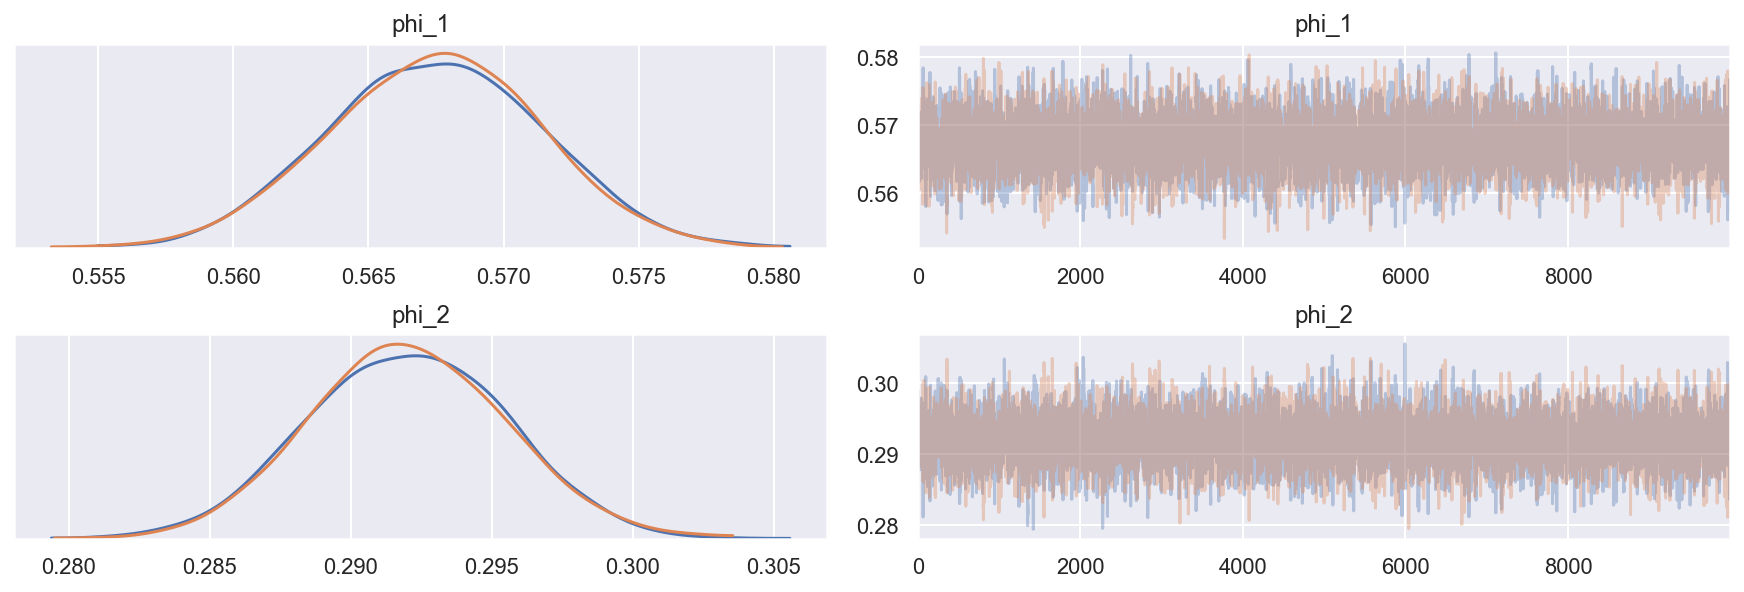

In [42]:
with pm.Model() as ar2:
    phi1 = pm.Normal('phi_1', mu=0, sigma=sigma)
    phi2 = pm.Normal('phi_2', mu=0, sigma=sigma)
    data = pm.AR('p', [phi1, phi2], observed=maximos_sl_tucuman['San Luis Tucuman'])
    trace = pm.sample(10000, tune=4000)
    map_ar2 = pm.find_MAP()

pm.traceplot(trace);

In [43]:
phi1_hat = map_ar2['phi_1']
phi2_hat = map_ar2['phi_2']

In [44]:
def ar2_process(steps, phis, last_prices):
    prices = last_prices.copy()

    for i in range(steps):
        last, second_last, *rest = prices
        next_price = phis[0] * last + phis[1] * second_last
        prices = [next_price] + prices
    
    return np.array(prices[:-2])[::-1]

In [45]:
second_to_last_value = maximos_sl_tucuman['San Luis Tucuman'].values[-2]
forecast = ar2_process(steps, [phi1_hat, phi2_hat], [last_value, second_to_last_value])
forecasts = pd.DataFrame({'forecast': forecast},
                         index=forecast_period)
forecast_df = maximos_sl_tucuman.append(forecasts, sort=True)

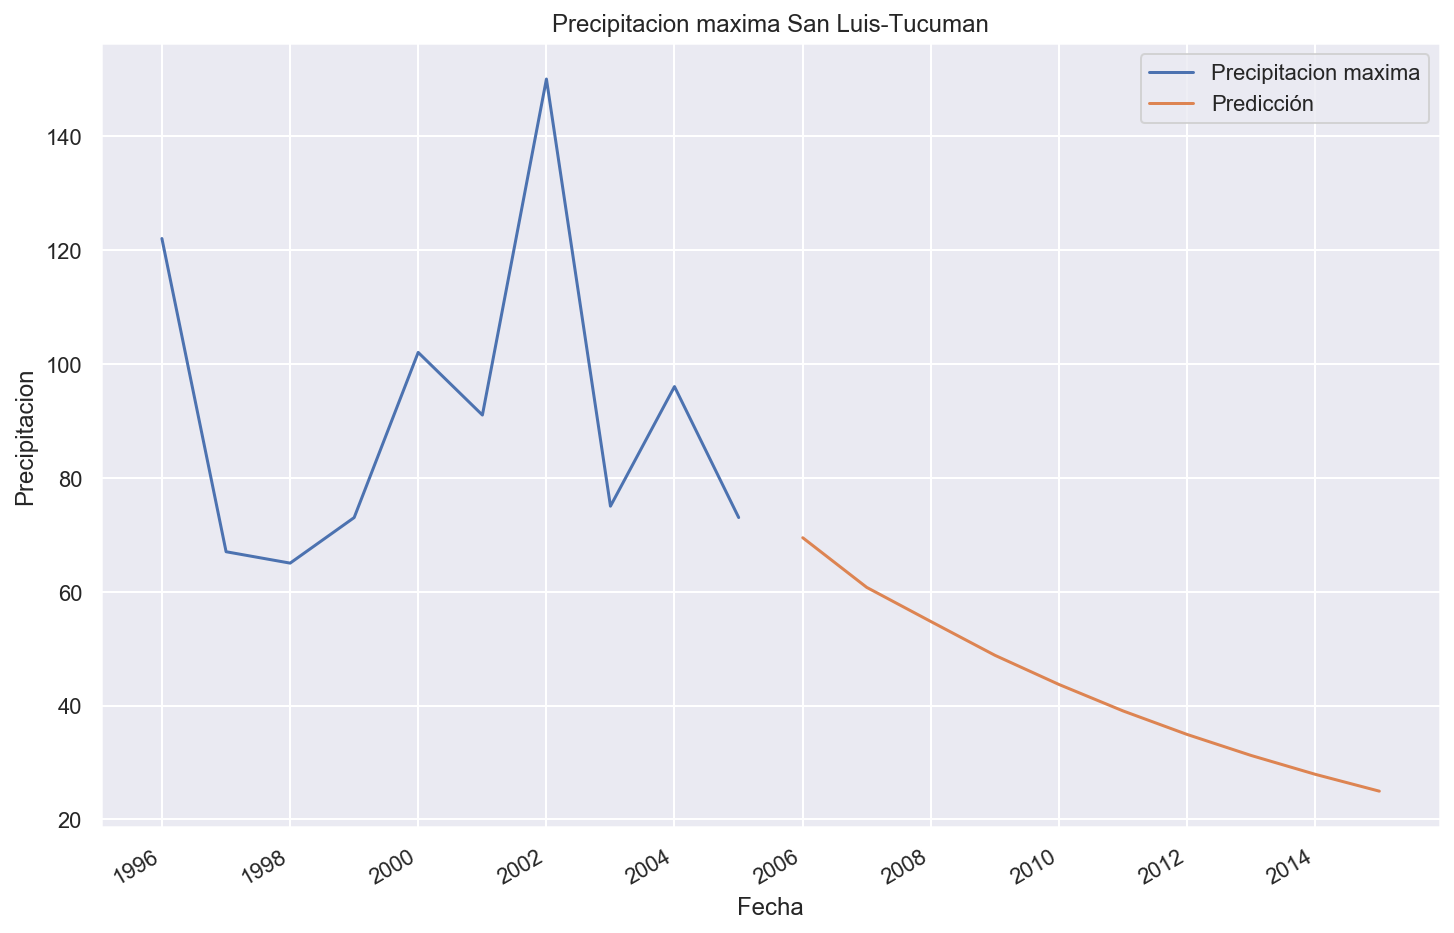

In [46]:
plot_forecast(forecast_df)

## SVR (Support Vector Regression)

In [47]:
from sklearn.svm import SVR

In [48]:
clf = SVR(C=1.0, epsilon=0.2)

In [49]:
samples = maximos_sl_tucuman['San Luis Tucuman'].values

In [50]:
predictores

,año,humedad esp (g/kg),omega (Pa/s),SLP PACIFICO,P ATL,indice SOI,indice SAM,
0,1949-01-01,8.7958,0.002598,1018.8150,1017.2874,NaN,NaN,NaN
1,1950-01-01,10.6268,-0.022770,1019.0520,1015.9596,NaN,NaN,NaN
2,1951-01-01,10.2252,-0.020314,1018.1772,1016.6636,NaN,NaN,NaN
3,1952-01-01,11.3264,-0.026402,1019.0196,1016.5650,-0.50,NaN,NaN
4,1953-01-01,11.2208,-0.024602,1020.5140,1016.7198,-0.32,NaN,NaN
...,...,...,...,...,...,...,...,...
56,2005-01-01,9.8304,-0.006218,1018.5230,1016.6502,-0.80,0.068,NaN
57,2006-01-01,9.8702,-0.001826,1019.4860,1016.5544,0.68,-0.346,NaN
58,2007-01-01,9.9726,-0.014746,1019.5448,1017.2342,-0.18,0.620,NaN
59,2008-01-01,9.6392,-0.002994,1019.2134,1016.7224,1.68,1.422,NaN


In [51]:
variables = predictores.set_index('año')

In [52]:
truncated_variables = variables.truncate(before='1973-01-01', after='2005-12-31')
humedad = truncated_variables['humedad esp (g/kg)'].values
omega = truncated_variables['omega (Pa/s)'].values
SLP_PACIFICO = truncated_variables['SLP PACIFICO '].values
P_ATL = truncated_variables['P ATL '].values

In [53]:
features = list(zip(humedad, omega, SLP_PACIFICO, P_ATL))

In [54]:
training_features = features[:-5]
training_samples = samples[:-5]
test_features = features[-5:]
test_samples = samples[-5:]

In [55]:
clf.fit(training_features, training_samples)
predicted = clf.predict(test_features)

In [56]:
predicted

array([84.50002213, 84.50001661, 84.50001922, 84.50000502, 84.50001919])

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
mean_absolute_error(test_samples, predicted)

20.89999892725841

## Datos de GHCN

https://www.ncdc.noaa.gov/ghcnd-data-access

In [59]:
import os

In [62]:
dfs = []
for file in os.listdir('data/GHCN-daily/'):
    df = pd.read_csv('data/GHCN-daily/' + file, parse_dates=['DATE'])
    dfs.append(df)
    
merged = pd.concat(dfs, ignore_index=True, sort=False)
merged.to_csv('data/GHCN-daily/precipitation_ar.csv', index=False)

IsADirectoryError: [Errno 21] Is a directory: 'data/GHCN-daily/.ipynb_checkpoints'

In [60]:
precipitacion_diaria = pd.read_csv('data/GHCN-daily/precipitation_ar.csv', parse_dates=['DATE'])
precipitacion_diaria.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP
0,ARM00087550,"NUEVE DE JULIO, AR",-35.45,-60.883,76.0,1975-05-26,NaN
1,ARM00087550,"NUEVE DE JULIO, AR",-35.45,-60.883,76.0,1975-05-28,NaN
2,ARM00087550,"NUEVE DE JULIO, AR",-35.45,-60.883,76.0,1975-08-12,NaN
3,ARM00087550,"NUEVE DE JULIO, AR",-35.45,-60.883,76.0,1975-09-26,NaN
4,ARM00087550,"NUEVE DE JULIO, AR",-35.45,-60.883,76.0,1975-10-09,NaN


In [61]:
precipitacion_diaria.set_index('DATE', inplace=True)

In [62]:
import folium

In [63]:
m = folium.Map(location=[-35, -60], zoom_start=5)
stations = precipitacion_diaria.groupby('STATION').first().reset_index()

In [64]:
for station, group in precipitacion_diaria.groupby('STATION'):
    _station, name, lat, lon, *_ = group.iloc[0]
    
    mark = folium.Marker(location=[lat, lon], tooltip=name, popup=group.describe().to_html())
    mark.add_to(m)

In [65]:
m

In [66]:
estaciones_noa = precipitacion_diaria.query('LATITUDE > -32 & LONGITUDE < -62') 

In [67]:
estaciones_noa

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP
DATE,,,,,,
1973-06-18,ARM00087320,"CHAMICAL AERO, AR",-30.367,-66.283,461.0,0.0
1973-06-27,ARM00087320,"CHAMICAL AERO, AR",-30.367,-66.283,461.0,0.0
1973-09-01,ARM00087320,"CHAMICAL AERO, AR",-30.367,-66.283,461.0,0.0
1973-09-09,ARM00087320,"CHAMICAL AERO, AR",-30.367,-66.283,461.0,0.0
1973-09-13,ARM00087320,"CHAMICAL AERO, AR",-30.367,-66.283,461.0,0.0
...,...,...,...,...,...,...
2020-02-12,ARM00087311,"SAN JUAN, AR",-31.571,-68.418,597.1,NaN
2020-02-13,ARM00087311,"SAN JUAN, AR",-31.571,-68.418,597.1,NaN
2020-02-14,ARM00087311,"SAN JUAN, AR",-31.571,-68.418,597.1,NaN


In [71]:
sns.relplot(x='DATE', y='PRCP', col='NAME', hue='NAME', col_wrap=4, data=estaciones_noa);

ValueError: Could not interpret input 'DATE'

In [ ]:
mapa_noa = folium.Map(location=[-28, -65], zoom_start=5, width=600, height=500)

In [ ]:
for station, group in estaciones_noa.groupby('STATION'):
    _station, name, lat, lon, *_ = group.iloc[0]
    
    mark = folium.Marker(location=[lat, lon], tooltip=name, popup=group.describe().to_html())
    mark.add_to(mapa_noa)

In [ ]:
# Agregamos al mapa las estaciones del dataset del concurso
for idx, (estacion, _prov, _org, coordenadas, *_) in estaciones_info.iterrows():
    lat, lon = coordenadas.split(',')
    marker = folium.Marker(location=[-float(lat), -float(lon)], tooltip=estacion, icon=folium.Icon(color='red'))
    marker.add_to(mapa_noa)

In [ ]:
mapa_noa